In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
import keras
import tensorflow as tf
warnings.filterwarnings('ignore')
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,BatchNormalization,AveragePooling2D
from keras.optimizers import RMSprop, Adam
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Result Print Function
def result_print (model):
  results = []
  scoreTrain = model.evaluate(x_train, y_train, verbose=1)
  print("Train loss: {} - Train accuracy: {}".format(scoreTrain[0], scoreTrain[1]))
  results.append(scoreTrain[1])
  print()
  scoreVal = model.evaluate(x_val, y_val, verbose=1)
  print("Validation loss: {} - Validation accuracy: {}".format(scoreVal[0],scoreVal[1]))
  print()
  scoreTest = model.evaluate(x_test, y_test, verbose=1)
  print("Test loss: {} - Test accuracy: {}".format(scoreTest[0],scoreTest[1]))
  results.append(scoreTest[1])
  return results

In [ ]:
# Plot Accuracy Function
def plot (history_model):
  plt.plot(history_model.history['accuracy'], label='train')
  plt.plot(history_model.history['val_accuracy'], label='test')
  plt.title("Accuray Changes")
  plt.xlabel("Epochs")
  plt.ylabel("Acc")
  plt.legend()
  plt.show()

In [ ]:
model_names = ['Without Augmentation/BatchNormalization/Dropout','Without Dropout/BatchNormalization',
              'Without Dropout and with BatchNormalization','With Dropout-BatchNormalization',
              'Less Pooling Layer','Extra Hidden Layer']
accTest=[]
accTrain=[]
d ={}

# Preprocess

In [ ]:
# Preparing Dataset
(x_train,y_train), (x_test, y_test) =cifar10.load_data()
print('Train samples', x_train.shape[0])
print('Test samples', x_test.shape[0])
y_train=to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Train samples 50000
Test samples 10000


In [ ]:
## Normalization
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train = x_train/255
x_test=x_test/255

In [ ]:
## Train Validation Split and Augmentation
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.1)
print('Train samples with split', x_train.shape)
print('Validation samples with split', x_val.shape)

Train samples with split (45000, 32, 32, 3)
Validation samples with split (5000, 32, 32, 3)


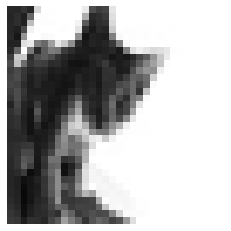

In [ ]:
## One Picture
img = x_train[7]
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
# Early Stopping
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=8, verbose=1)





# Without Augmentation, Without BatchNormalization and Without Dropout


In [ ]:
batch_size= 128
epochs=100
num_classes =10
model_1 = Sequential()
model_1.add(Conv2D(filters = 32, kernel_size = (3,3),padding='Same',activation ='relu', input_shape = x_train.shape[1:]))
model_1.add(Conv2D(filters = 64, kernel_size = (3,3),padding='Same',activation ='relu'))
model_1.add(AveragePooling2D(pool_size=(2,2)))
model_1.add(Conv2D(filters = 64, kernel_size = (3,3),padding='Same',activation ='relu'))
model_1.add(AveragePooling2D(pool_size=(2,2)))
model_1.add(Conv2D(filters = 128, kernel_size = (3,3), activation ='relu',padding='Same'))
model_1.add(Conv2D(filters = 256, kernel_size = (3,3), activation ='relu', padding='Same'))
model_1.add(AveragePooling2D(pool_size=(2,2)))
model_1.add(Flatten())
model_1.add(Dense(512,activation='relu'))
model_1.add(Dense(num_classes,activation='softmax'))
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
average_pooling2d_6 (Average (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d_7 (Average (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 256)        

In [ ]:
model_1.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

In [ ]:
history_1=model_1.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,validation_data=(x_val,y_val),callbacks=[callback])

Epoch 1/100
352/352 [==============================] - 6s 16ms/step - loss: 1.8198 - accuracy: 0.3209 - val_loss: 1.2924 - val_accuracy: 0.5390
Epoch 2/100
352/352 [==============================] - 5s 15ms/step - loss: 1.1890 - accuracy: 0.5759 - val_loss: 0.9745 - val_accuracy: 0.6626
Epoch 3/100
352/352 [==============================] - 5s 15ms/step - loss: 0.9005 - accuracy: 0.6826 - val_loss: 0.7851 - val_accuracy: 0.7256
Epoch 4/100
352/352 [==============================] - 5s 15ms/step - loss: 0.7304 - accuracy: 0.7449 - val_loss: 0.7661 - val_accuracy: 0.7306
Epoch 5/100
352/352 [==============================] - 5s 15ms/step - loss: 0.6230 - accuracy: 0.7815 - val_loss: 0.6763 - val_accuracy: 0.7674
Epoch 6/100
352/352 [==============================] - 5s 16ms/step - loss: 0.5276 - accuracy: 0.8162 - val_loss: 0.6365 - val_accuracy: 0.7832
Epoch 7/100
352/352 [==============================] - 5s 16ms/step - loss: 0.4190 - accuracy: 0.8545 - val_loss: 0.6287 - val_accuracy:

In [ ]:
# Result Print
results = result_print(model_1)
accTest.append(results[1])
accTrain.append(results[0])

1407/1407 [==============================] - 5s 3ms/step - loss: 0.0469 - accuracy: 0.9848
Train loss: 0.04688968509435654 - Train accuracy: 0.9847999811172485

157/157 [==============================] - 1s 4ms/step - loss: 1.1658 - accuracy: 0.7858
Validation loss: 1.1658434867858887 - Validation accuracy: 0.7857999801635742

313/313 [==============================] - 1s 3ms/step - loss: 1.1922 - accuracy: 0.7818
Test loss: 1.192232370376587 - Test accuracy: 0.7817999720573425


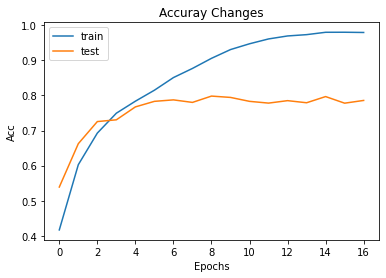

In [ ]:
# Plot Accuracy
plot(history_1)

# Without Dropout and Without BatchNormalization


---
In this model and the following models, augmentation done data set has been studied.




In [ ]:
# Augmentation
datagen = ImageDataGenerator(    featurewise_center=False,
                                 samplewise_center=False,
                                 featurewise_std_normalization=False,
                                 samplewise_std_normalization=False,
                                 zca_whitening=False,
                                 rotation_range=30,
                                 width_shift_range=0.2,  # Görüntüleri rasgele olarak yatay olarak kaydırın.
                                 height_shift_range=0.2,  # Görüntüleri rasgele olarak dikey olarak kaydırın.
                                 horizontal_flip=True,  # Fotoğrafı yatay düzlemde rastgele çevirme.
                                 vertical_flip=False,
                                 zoom_range =0.2)
datagen.fit(x_train)

In [ ]:
batch_size= 128
epochs=100
num_classes =10
model_2 = Sequential()
model_2.add(Conv2D(filters = 32, kernel_size = (3,3),padding='Same',activation ='relu', input_shape = x_train.shape[1:]))
model_2.add(Conv2D(filters = 64, kernel_size = (3,3),padding='Same',activation ='relu'))
model_2.add(AveragePooling2D(pool_size=(2,2)))
model_2.add(Conv2D(filters = 64, kernel_size = (3,3),padding='Same',activation ='relu'))
model_2.add(AveragePooling2D(pool_size=(2,2)))
model_2.add(Conv2D(filters = 128, kernel_size = (3,3), activation ='relu',padding='Same'))
model_2.add(Conv2D(filters = 256, kernel_size = (3,3), activation ='relu', padding='Same'))
model_2.add(AveragePooling2D(pool_size=(2,2)))
model_2.add(Flatten())
model_2.add(Dense(512,activation='relu'))
model_2.add(Dense(num_classes,activation='softmax'))
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
average_pooling2d_9 (Average (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d_10 (Averag (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 8, 256)        

In [ ]:
model_2.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

In [ ]:
history_2=model_2.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),steps_per_epoch = int(np.ceil(x_train.shape[0]/float(batch_size))),
                            epochs=epochs,validation_data=(x_val,y_val),callbacks=[callback])

Epoch 1/100
352/352 [==============================] - 24s 68ms/step - loss: 1.9778 - accuracy: 0.2638 - val_loss: 1.4984 - val_accuracy: 0.4648
Epoch 2/100
352/352 [==============================] - 24s 68ms/step - loss: 1.5579 - accuracy: 0.4306 - val_loss: 1.3511 - val_accuracy: 0.5166
Epoch 3/100
352/352 [==============================] - 23s 67ms/step - loss: 1.3916 - accuracy: 0.4939 - val_loss: 1.1902 - val_accuracy: 0.5836
Epoch 4/100
352/352 [==============================] - 24s 67ms/step - loss: 1.2476 - accuracy: 0.5515 - val_loss: 1.1372 - val_accuracy: 0.5986
Epoch 5/100
352/352 [==============================] - 24s 68ms/step - loss: 1.1755 - accuracy: 0.5796 - val_loss: 1.0298 - val_accuracy: 0.6362
Epoch 6/100
352/352 [==============================] - 24s 67ms/step - loss: 1.1019 - accuracy: 0.6049 - val_loss: 1.0316 - val_accuracy: 0.6444
Epoch 7/100
352/352 [==============================] - 24s 68ms/step - loss: 1.0629 - accuracy: 0.6233 - val_loss: 0.8564 - val_ac

In [ ]:
# Result Print
results = result_print(model_2)
accTest.append(results[1])
accTrain.append(results[0])

1407/1407 [==============================] - 5s 3ms/step - loss: 0.3396 - accuracy: 0.8832
Train loss: 0.3395839333534241 - Train accuracy: 0.883222222328186

157/157 [==============================] - 1s 3ms/step - loss: 0.5248 - accuracy: 0.8294
Validation loss: 0.5247556567192078 - Validation accuracy: 0.8294000029563904

313/313 [==============================] - 1s 3ms/step - loss: 0.5803 - accuracy: 0.8201
Test loss: 0.5803015828132629 - Test accuracy: 0.8201000094413757


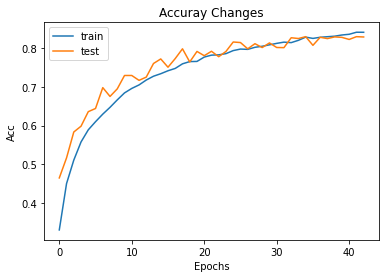

In [ ]:
# plot accuracy
plt.plot(history_2.history['accuracy'], label='train')
plt.plot(history_2.history['val_accuracy'], label='test')
plt.title("Accuray Changes")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()
plt.show()

# Without Dropout and with BatchNormalization

In [ ]:
batch_size= 128
epochs=100
num_classes =10
model_3 = Sequential()
model_3.add(Conv2D(filters = 32, kernel_size = (3,3),padding='Same',activation ='relu', input_shape = x_train.shape[1:]))
model_3.add(BatchNormalization())
model_3.add(Conv2D(filters = 64, kernel_size = (3,3),padding='Same',activation ='relu'))
model_3.add(BatchNormalization())
model_3.add(AveragePooling2D(pool_size=(2,2)))
model_3.add(Conv2D(filters = 64, kernel_size = (3,3),padding='Same',activation ='relu'))
model_3.add(BatchNormalization())
model_3.add(AveragePooling2D(pool_size=(2,2)))
model_3.add(Conv2D(filters = 128, kernel_size = (3,3), activation ='relu',padding='Same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(filters = 256, kernel_size = (3,3), activation ='relu', padding='Same'))
model_3.add(BatchNormalization())
model_3.add(AveragePooling2D(pool_size=(2,2)))
model_3.add(Flatten())
model_3.add(Dense(512,activation='relu'))
model_3.add(Dense(num_classes,activation='softmax'))
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
average_pooling2d_12 (Averag (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)       

In [ ]:
model_3.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

In [ ]:
history_3=model_3.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),steps_per_epoch = int(np.ceil(x_train.shape[0]/float(batch_size))),
                            epochs=epochs,validation_data=(x_val,y_val),callbacks=[callback])

Epoch 1/100
352/352 [==============================] - 25s 69ms/step - loss: 1.8700 - accuracy: 0.3584 - val_loss: 3.2263 - val_accuracy: 0.1730
Epoch 2/100
352/352 [==============================] - 24s 69ms/step - loss: 1.3100 - accuracy: 0.5272 - val_loss: 1.0033 - val_accuracy: 0.6492
Epoch 3/100
352/352 [==============================] - 25s 70ms/step - loss: 1.1110 - accuracy: 0.6003 - val_loss: 0.9595 - val_accuracy: 0.6640
Epoch 4/100
352/352 [==============================] - 25s 70ms/step - loss: 0.9818 - accuracy: 0.6489 - val_loss: 1.0037 - val_accuracy: 0.6538
Epoch 5/100
352/352 [==============================] - 25s 70ms/step - loss: 0.8864 - accuracy: 0.6847 - val_loss: 0.8709 - val_accuracy: 0.7032
Epoch 6/100
352/352 [==============================] - 25s 70ms/step - loss: 0.8219 - accuracy: 0.7119 - val_loss: 0.8762 - val_accuracy: 0.7228
Epoch 7/100
352/352 [==============================] - 25s 70ms/step - loss: 0.7567 - accuracy: 0.7369 - val_loss: 0.7897 - val_ac

In [ ]:
# Result Print
results = result_print(model_3)
accTest.append(results[1])
accTrain.append(results[0])

1407/1407 [==============================] - 5s 3ms/step - loss: 0.3240 - accuracy: 0.8928
Train loss: 0.3240291178226471 - Train accuracy: 0.8928222060203552

157/157 [==============================] - 1s 3ms/step - loss: 0.5643 - accuracy: 0.8394
Validation loss: 0.5643081665039062 - Validation accuracy: 0.8393999934196472

313/313 [==============================] - 1s 3ms/step - loss: 0.6068 - accuracy: 0.8270
Test loss: 0.6067510843276978 - Test accuracy: 0.8270000219345093


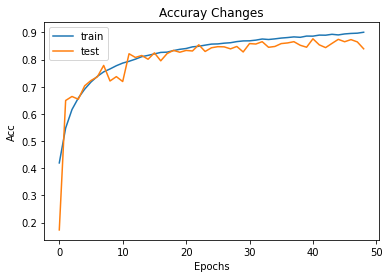

In [ ]:
# plot accuracy
plt.plot(history_3.history['accuracy'], label='train')
plt.plot(history_3.history['val_accuracy'], label='test')
plt.title("Accuray Changes")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()
plt.show()

# With Dropout-BatchNormalization

In [ ]:
batch_size= 128
epochs=100
num_classes =10
model_4 = Sequential()
model_4.add(Conv2D(filters = 32, kernel_size = (3,3),padding='Same',activation ='relu', input_shape = x_train.shape[1:]))
model_4.add(BatchNormalization())
model_4.add(Conv2D(filters = 64, kernel_size = (3,3),padding='Same',activation ='relu'))
model_4.add(BatchNormalization())
model_4.add(AveragePooling2D(pool_size=(2,2)))
model_4.add(Conv2D(filters = 64, kernel_size = (3,3),padding='Same',activation ='relu'))
model_4.add(BatchNormalization())
model_4.add(AveragePooling2D(pool_size=(2,2)))
model_4.add(Dropout(0.1))
model_4.add(Conv2D(filters = 128, kernel_size = (3,3), activation ='relu',padding='Same'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(filters = 256, kernel_size = (3,3), activation ='relu', padding='Same'))
model_4.add(BatchNormalization())
model_4.add(AveragePooling2D(pool_size=(2,2)))
model_4.add(Dropout(0.2))
model_4.add(Flatten())
model_4.add(Dense(512,activation='relu'))
model_4.add(Dropout(0.2))
model_4.add(Dense(num_classes,activation='softmax'))
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
average_pooling2d_15 (Averag (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 64)       

In [ ]:
model_4.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = Adam(),
              metrics=["accuracy"])

In [ ]:
history_4=model_4.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),steps_per_epoch = int(np.ceil(x_train.shape[0]/float(batch_size))),
                            epochs=epochs,validation_data=(x_val,y_val),callbacks=[callback])

Epoch 1/100
352/352 [==============================] - 25s 67ms/step - loss: 1.9042 - accuracy: 0.3430 - val_loss: 4.0152 - val_accuracy: 0.1534
Epoch 2/100
352/352 [==============================] - 23s 66ms/step - loss: 1.3925 - accuracy: 0.4984 - val_loss: 1.2846 - val_accuracy: 0.5772
Epoch 3/100
352/352 [==============================] - 23s 66ms/step - loss: 1.2298 - accuracy: 0.5634 - val_loss: 1.0024 - val_accuracy: 0.6556
Epoch 4/100
352/352 [==============================] - 23s 67ms/step - loss: 1.1005 - accuracy: 0.6052 - val_loss: 0.9681 - val_accuracy: 0.6670
Epoch 5/100
352/352 [==============================] - 23s 66ms/step - loss: 1.0044 - accuracy: 0.6446 - val_loss: 0.9995 - val_accuracy: 0.6686
Epoch 6/100
352/352 [==============================] - 23s 66ms/step - loss: 0.9352 - accuracy: 0.6717 - val_loss: 0.8471 - val_accuracy: 0.7062
Epoch 7/100
352/352 [==============================] - 23s 66ms/step - loss: 0.8859 - accuracy: 0.6901 - val_loss: 0.7085 - val_ac

In [ ]:
# Result Print
results = result_print(model_4)
accTest.append(results[1])
accTrain.append(results[0])

1407/1407 [==============================] - 5s 3ms/step - loss: 0.3491 - accuracy: 0.8854
Train loss: 0.34910643100738525 - Train accuracy: 0.8853999972343445

157/157 [==============================] - 1s 3ms/step - loss: 0.4924 - accuracy: 0.8506
Validation loss: 0.49241259694099426 - Validation accuracy: 0.850600004196167

313/313 [==============================] - 1s 3ms/step - loss: 0.5176 - accuracy: 0.8416
Test loss: 0.5175735950469971 - Test accuracy: 0.8416000008583069


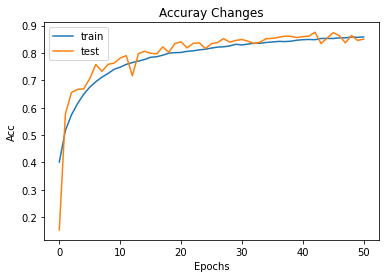

In [ ]:
# plot accuracy
plt.plot(history_4.history['accuracy'], label='train')
plt.plot(history_4.history['val_accuracy'], label='test')
plt.title("Accuray Changes")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()
plt.show()

# Less Pooling Layer

In [ ]:
batch_size= 128
epochs=100
num_classes =10
model_5 = Sequential()
model_5.add(Conv2D(filters = 32, kernel_size = (3,3),padding='Same',activation ='relu', input_shape = x_train.shape[1:]))
model_5.add(BatchNormalization())
model_5.add(Conv2D(filters = 64, kernel_size = (3,3),padding='Same',activation ='relu'))
model_5.add(BatchNormalization())
model_5.add(Conv2D(filters = 64, kernel_size = (3,3),padding='Same',activation ='relu'))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.1))
model_5.add(Conv2D(filters = 128, kernel_size = (3,3), activation ='relu',padding='Same'))
model_5.add(BatchNormalization())
model_5.add(Conv2D(filters = 256, kernel_size = (3,3), activation ='relu', padding='Same'))
model_5.add(BatchNormalization())
model_5.add(AveragePooling2D(pool_size=(2,2)))
model_5.add(Dropout(0.2))
model_5.add(Flatten())
model_5.add(Dense(512,activation='relu'))
model_5.add(Dropout(0.2))
model_5.add(Dense(num_classes,activation='softmax'))
model_5.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 64)       

In [ ]:
model_5.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = Adam(),
              metrics=["accuracy"])

In [ ]:
history_5=model_5.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),steps_per_epoch = int(np.ceil(x_train.shape[0]/float(batch_size))),
                            epochs=epochs,validation_data=(x_val,y_val),callbacks=[callback])

Epoch 1/100
352/352 [==============================] - 36s 95ms/step - loss: 2.7899 - accuracy: 0.2211 - val_loss: 2.9407 - val_accuracy: 0.1578
Epoch 2/100
352/352 [==============================] - 32s 90ms/step - loss: 1.7244 - accuracy: 0.3504 - val_loss: 1.6853 - val_accuracy: 0.4430
Epoch 3/100
352/352 [==============================] - 32s 90ms/step - loss: 1.5700 - accuracy: 0.4211 - val_loss: 1.4037 - val_accuracy: 0.5062
Epoch 4/100
352/352 [==============================] - 32s 90ms/step - loss: 1.4486 - accuracy: 0.4743 - val_loss: 1.1243 - val_accuracy: 0.5974
Epoch 5/100
352/352 [==============================] - 32s 90ms/step - loss: 1.3842 - accuracy: 0.4938 - val_loss: 1.4404 - val_accuracy: 0.5382
Epoch 6/100
352/352 [==============================] - 32s 90ms/step - loss: 1.3171 - accuracy: 0.5204 - val_loss: 1.0529 - val_accuracy: 0.6342
Epoch 7/100
352/352 [==============================] - 32s 89ms/step - loss: 1.2378 - accuracy: 0.5555 - val_loss: 1.2499 - val_ac

In [ ]:
# Result Print
results = result_print(model_5)
accTest.append(results[1])
accTrain.append(results[0])

1407/1407 [==============================] - 10s 7ms/step - loss: 0.5838 - accuracy: 0.8215
Train loss: 0.5838494896888733 - Train accuracy: 0.8214889168739319

157/157 [==============================] - 1s 7ms/step - loss: 0.6736 - accuracy: 0.8000
Validation loss: 0.6735551953315735 - Validation accuracy: 0.800000011920929

313/313 [==============================] - 2s 7ms/step - loss: 0.7203 - accuracy: 0.7900
Test loss: 0.7203139066696167 - Test accuracy: 0.7900000214576721


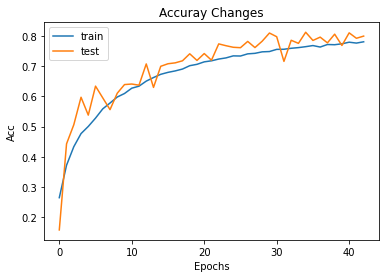

In [ ]:
# plot accuracy
plt.plot(history_5.history['accuracy'], label='train')
plt.plot(history_5.history['val_accuracy'], label='test')
plt.title("Accuray Changes")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()
plt.show()





# Extra Hidden Layer

In [ ]:
batch_size= 128
epochs=100
num_classes =10
model_6 = Sequential()
model_6.add(Conv2D(filters = 32, kernel_size = (3,3),padding='Same',activation ='relu', input_shape = x_train.shape[1:]))
model_6.add(BatchNormalization())
model_6.add(Conv2D(filters = 64, kernel_size = (3,3),padding='Same',activation ='relu'))
model_6.add(BatchNormalization())
model_6.add(AveragePooling2D(pool_size=(2,2)))
model_6.add(Conv2D(filters = 64, kernel_size = (3,3),padding='Same',activation ='relu'))
model_6.add(BatchNormalization())
model_6.add(AveragePooling2D(pool_size=(2,2)))
model_6.add(Dropout(0.1))
model_6.add(Conv2D(filters = 128, kernel_size = (3,3), activation ='relu',padding='Same'))
model_6.add(BatchNormalization())
model_6.add(Conv2D(filters = 256, kernel_size = (3,3), activation ='relu', padding='Same'))
model_6.add(BatchNormalization())
model_6.add(AveragePooling2D(pool_size=(2,2)))
model_6.add(Dropout(0.2))
model_6.add(Flatten())
model_6.add(Dense(512,activation='relu'))
model_6.add(Dropout(0.2))
model_6.add(Dense(216,activation='relu'))
model_6.add(Dense(num_classes,activation='softmax'))
model_6.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
average_pooling2d_19 (Averag (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
batch_normalization_17 (Batc (None, 16, 16, 64)       

In [ ]:
model_6.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = Adam(),
              metrics=["accuracy"])

In [ ]:
history_6=model_6.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),steps_per_epoch = int(np.ceil(x_train.shape[0]/float(batch_size))),
                            epochs=epochs,validation_data=(x_val,y_val),callbacks=[callback])

Epoch 1/100
352/352 [==============================] - 25s 69ms/step - loss: 1.8481 - accuracy: 0.3368 - val_loss: 2.5608 - val_accuracy: 0.2246
Epoch 2/100
352/352 [==============================] - 24s 69ms/step - loss: 1.3744 - accuracy: 0.5044 - val_loss: 1.2363 - val_accuracy: 0.5614
Epoch 3/100
352/352 [==============================] - 25s 71ms/step - loss: 1.1963 - accuracy: 0.5732 - val_loss: 1.1387 - val_accuracy: 0.6138
Epoch 4/100
352/352 [==============================] - 25s 70ms/step - loss: 1.0624 - accuracy: 0.6216 - val_loss: 0.9739 - val_accuracy: 0.6668
Epoch 5/100
352/352 [==============================] - 24s 68ms/step - loss: 0.9685 - accuracy: 0.6589 - val_loss: 0.8717 - val_accuracy: 0.7036
Epoch 6/100
352/352 [==============================] - 24s 68ms/step - loss: 0.8943 - accuracy: 0.6893 - val_loss: 0.9033 - val_accuracy: 0.6970
Epoch 7/100
352/352 [==============================] - 24s 68ms/step - loss: 0.8368 - accuracy: 0.7100 - val_loss: 0.9004 - val_ac

In [ ]:
# Result Print
results = result_print(model_6)
accTest.append(results[1])
accTrain.append(results[0])

1407/1407 [==============================] - 5s 4ms/step - loss: 0.3834 - accuracy: 0.8698
Train loss: 0.3833768963813782 - Train accuracy: 0.8698444366455078

157/157 [==============================] - 1s 4ms/step - loss: 0.4956 - accuracy: 0.8356
Validation loss: 0.49557816982269287 - Validation accuracy: 0.8356000185012817

313/313 [==============================] - 1s 4ms/step - loss: 0.5266 - accuracy: 0.8306
Test loss: 0.5266453623771667 - Test accuracy: 0.8306000232696533


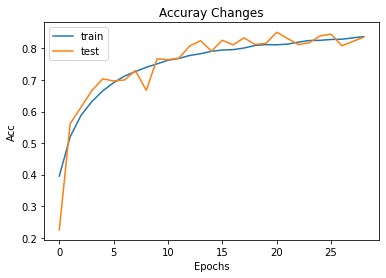

In [ ]:
# plot accuracy
plt.plot(history_6.history['accuracy'], label='train')
plt.plot(history_6.history['val_accuracy'], label='test')
plt.title("Accuray Changes")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()
plt.show()

# Results

In [ ]:
d={'Models':model_names,'Accuracy':accTest}
d

{'Accuracy': [0.7817999720573425,
  0.8201000094413757,
  0.8270000219345093,
  0.8416000008583069,
  0.7900000214576721,
  0.8306000232696533],
 'Models': ['Without Augmentation/BatchNormalization/Dropout',
  'Without Dropout/BatchNormalization',
  'Without Dropout and with BatchNormalization',
  'With Dropout-BatchNormalization',
  'Less Pooling Layer',
  'Extra Hidden Layer']}

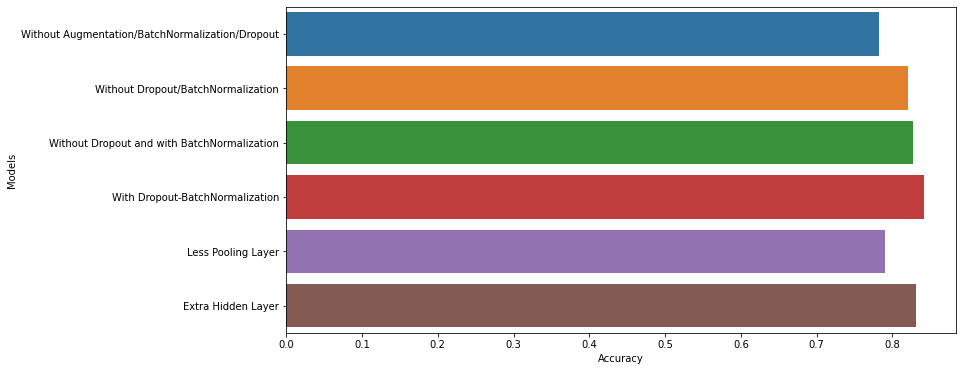

In [ ]:
acc_frame = pd.DataFrame(d)
plt.figure(figsize=(12, 6))
sns.barplot(y = 'Models', x = 'Accuracy', data = acc_frame)

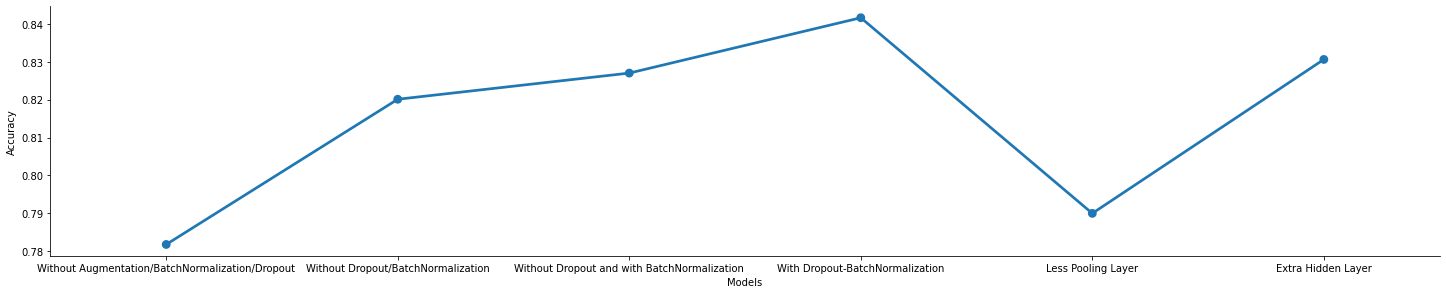

In [ ]:
sns.factorplot(x='Models',y='Accuracy',data=acc_frame,kind='point',size=4,aspect=5.0)

In [ ]:
resultsDF = pd.DataFrame({"Train Acc":accTrain, "Test Acc":accTest})
resultsDF.index=model_names
resultsDF

,Train Acc,Test Acc
Without Augmentation/BatchNormalization/Dropout,0.984800,0.7818
Without Dropout/BatchNormalization,0.883222,0.8201
Without Dropout and with BatchNormalization,0.892822,0.8270
With Dropout-BatchNormalization,0.885400,0.8416
Less Pooling Layer,0.821489,0.7900
Extra Hidden Layer,0.869844,0.8306
